#Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D,Conv1DTranspose,Concatenate,Input
import numpy as np
import IPython.display
import glob
from tqdm.notebook import tqdm
import librosa.display
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

#Extracting Data

#Load the Data

In [3]:
import tensorflow as tf
import glob
from tqdm import tqdm

def audio_dataset(files, batch_size=32):
    def generator():
        for file in files:
            audio, _ = tf.audio.decode_wav(tf.io.read_file(file), desired_channels=1)
            yield audio

    dataset = tf.data.Dataset.from_generator(generator, output_types=tf.float32)
    dataset = dataset.batch(batch_size)
    return dataset

clean_sounds = glob.glob('C:/Users/Balaji/Documents/noise_reduction/clean_trainset_wav/*')
noisy_sounds = glob.glob('C:/Users/Balaji/Documents/noise_reduction/noisy_trainset_wav/*')

clean_sounds_dataset = audio_dataset(clean_sounds)
noisy_sounds_dataset = audio_dataset(noisy_sounds)

clean_sounds_shape = tf.data.experimental.get_structure(clean_sounds_dataset)
noisy_sounds_shape = tf.data.experimental.get_structure(noisy_sounds_dataset)

print("Clean sounds shape:", clean_sounds_shape)
print("Noisy sounds shape:", noisy_sounds_shape)


Clean sounds shape: TensorSpec(shape=<unknown>, dtype=tf.float32, name=None)
Noisy sounds shape: TensorSpec(shape=<unknown>, dtype=tf.float32, name=None)


In [7]:
import tensorflow as tf
import glob
from tqdm import tqdm

batch_size = 12000

clean_sounds = glob.glob('C:/Users/Balaji/Documents/noise_reduction/clean_trainset_wav/*')
noisy_sounds = glob.glob('C:/Users/Balaji/Documents/noise_reduction/noisy_trainset_wav/*')

def audio_dataset(files, batch_size):
    def generator():
        for file in files:
            audio, _ = tf.audio.decode_wav(tf.io.read_file(file), desired_channels=1)
            yield audio

    dataset = tf.data.Dataset.from_generator(generator, output_types=tf.float32)
    dataset = dataset.shuffle(buffer_size=len(files))
    dataset = dataset.batch(batch_size)
    return dataset

clean_train_dataset = audio_dataset(clean_sounds, batch_size)
noisy_train_dataset = audio_dataset(noisy_sounds, batch_size)

clean_train_shape = tf.data.experimental.get_structure(clean_train_dataset)
noisy_train_shape = tf.data.experimental.get_structure(noisy_train_dataset)

print("Clean train shape:", clean_train_shape)
print("Noisy train shape:", noisy_train_shape)


Clean train shape: TensorSpec(shape=<unknown>, dtype=tf.float32, name=None)
Noisy train shape: TensorSpec(shape=<unknown>, dtype=tf.float32, name=None)


# Create a tf.data.Dataset

In [8]:
def get_dataset(x_train,y_train):
  dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
  dataset = dataset.shuffle(100).batch(64,drop_remainder=True)
  return dataset

In [9]:
train_dataset = get_dataset(noisy_train[:40000],clean_train[:40000])
test_dataset = get_dataset(noisy_train[40000:],clean_train[40000:])

#Reviewing Sample Waveform

In [11]:
librosa.display.waveshow(np.squeeze(clean_train[5].numpy(),axis=-1))
plt.show()
librosa.display.waveshow(np.squeeze(noisy_train[5].numpy(),axis=-1))
plt.show()

IndexError: list index out of range

#Creating the Model

In [ ]:
inp = Input(shape=(batching_size,1))
c1 = Conv1D(2,32,2,'same',activation='relu')(inp)
c2 = Conv1D(4,32,2,'same',activation='relu')(c1)
c3 = Conv1D(8,32,2,'same',activation='relu')(c2)
c4 = Conv1D(16,32,2,'same',activation='relu')(c3)
c5 = Conv1D(32,32,2,'same',activation='relu')(c4)

dc1 = Conv1DTranspose(32,32,1,padding='same')(c5)
conc = Concatenate()([c5,dc1])
dc2 = Conv1DTranspose(16,32,2,padding='same')(conc)
conc = Concatenate()([c4,dc2])
dc3 = Conv1DTranspose(8,32,2,padding='same')(conc)
conc = Concatenate()([c3,dc3])
dc4 = Conv1DTranspose(4,32,2,padding='same')(conc)
conc = Concatenate()([c2,dc4])
dc5 = Conv1DTranspose(2,32,2,padding='same')(conc)
conc = Concatenate()([c1,dc5])
dc6 = Conv1DTranspose(1,32,2,padding='same')(conc)
conc = Concatenate()([inp,dc6])
dc7 = Conv1DTranspose(1,32,1,padding='same',activation='linear')(conc)
model = tf.keras.models.Model(inp,dc7)
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 12000, 1)]   0                                            
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 6000, 2)      66          input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 3000, 4)      260         conv1d_10[0][0]                  
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 1500, 8)      1032        conv1d_11[0][0]                  
_______________________________________________________________________________________

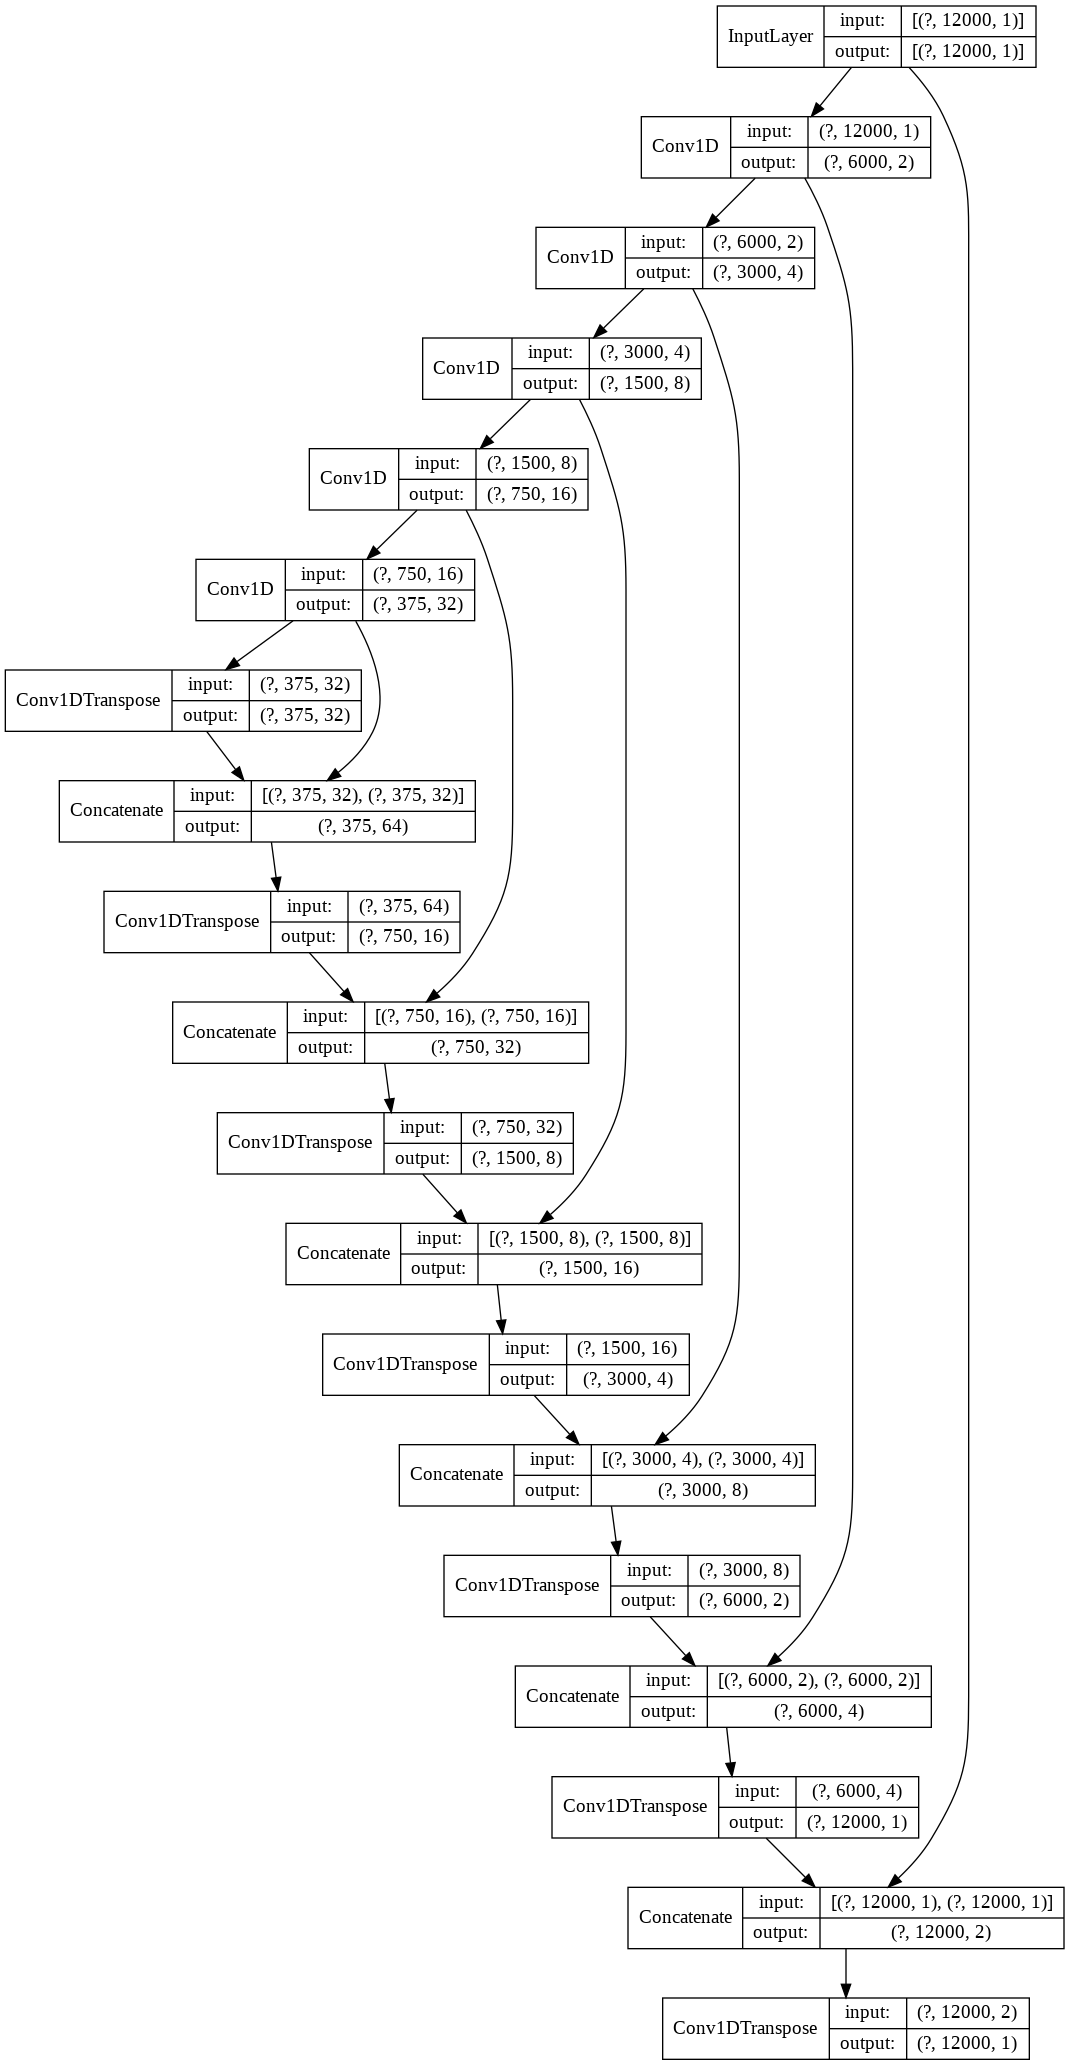

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=False)

#Training

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.002),loss=tf.keras.losses.MeanAbsoluteError())
history = model.fit(train_dataset,epochs=20)

Epoch 1/20
625/625 [==============================] - 14s 23ms/step - loss: 0.0175
Epoch 2/20
625/625 [==============================] - 14s 23ms/step - loss: 0.0137
Epoch 3/20
625/625 [==============================] - 15s 23ms/step - loss: 0.0129
Epoch 4/20
625/625 [==============================] - 14s 23ms/step - loss: 0.0126
Epoch 5/20
625/625 [==============================] - 14s 23ms/step - loss: 0.0124
Epoch 6/20
625/625 [==============================] - 14s 23ms/step - loss: 0.0123
Epoch 7/20
625/625 [==============================] - 14s 23ms/step - loss: 0.0122
Epoch 8/20
625/625 [==============================] - 14s 23ms/step - loss: 0.0121
Epoch 9/20
625/625 [==============================] - 14s 23ms/step - loss: 0.0121
Epoch 10/20
625/625 [==============================] - 15s 23ms/step - loss: 0.0120
Epoch 11/20
625/625 [==============================] - 14s 23ms/step - loss: 0.0120
Epoch 12/20
625/625 [==============================] - 15s 23ms/step - loss: 0.0119
E

#Testing Samples

In [ ]:
from IPython.display import Audio
Audio(np.squeeze(noisy_train[22].numpy()),rate=16000)

In [ ]:
Audio(tf.squeeze(model.predict(tf.expand_dims(tf.expand_dims(noisy_train[22],-1),0))),rate=16000)

In [ ]:
model.evaluate(test_dataset)   

79/79 [==============================] - 1s 13ms/step - loss: 0.0117


0.011701006442308426

In [ ]:
model.save('NoiseSuppressionModel.h5')

# Inference

Handling different sized audio inputs can be solved by overlapping prediction frames and removing the intersection part from the final waveform

In [ ]:
def get_audio(path):
  audio,_ = tf.audio.decode_wav(tf.io.read_file(path),1)
  return audio

In [ ]:
def inference_preprocess(path):
  audio = get_audio(path)
  audio_len = audio.shape[0]
  batches = []
  for i in range(0,audio_len-batching_size,batching_size):
    batches.append(audio[i:i+batching_size])

  batches.append(audio[-batching_size:])
  diff = audio_len - (i + batching_size)
  return tf.stack(batches), diff

In [ ]:
def predict(path):
  test_data,diff = inference_preprocess(path)
  predictions = model.predict(test_data)
  final_op = tf.reshape(predictions[:-1],((predictions.shape[0]-1)*predictions.shape[1],1))
  final_op = tf.concat((final_op,predictions[-1][-diff:]),axis=0)
  return final_op

In [ ]:
Audio(np.squeeze(get_audio(noisy_sounds[4]).numpy(),-1),rate=16000)

In [ ]:
Audio(tf.squeeze(predict(noisy_sounds[4])),rate=16000)

In [ ]:
%%timeit
tf.squeeze(predict(noisy_sounds[3]))

10 loops, best of 3: 31.3 ms per loop


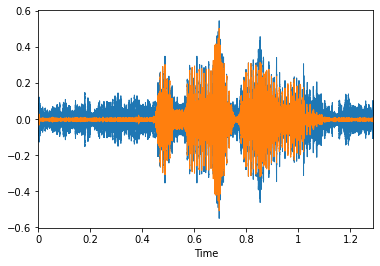

In [ ]:
librosa.display.waveplot(np.squeeze(get_audio(noisy_sounds[4]).numpy(),-1))
librosa.display.waveplot(np.squeeze(predict(noisy_sounds[4])))

#Quantization and TFLite Conversion

In [ ]:
lite_model = tf.lite.TFLiteConverter.from_keras_model(model)
lite_model.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model_quant = lite_model.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpvpgitboe/assets


In [ ]:
with open('TFLiteModel.tflite','wb') as f:
  f.write(tflite_model_quant)

#TFLite Inference

In [ ]:
interpreter = tf.lite.Interpreter(model_path='/content/TFLiteModel.tflite')
interpreter.allocate_tensors()

In [ ]:
def predict_tflite(path):
  test_audio,diff = inference_preprocess(path)
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  preds = []
  for i in test_audio:
    interpreter.set_tensor(input_index, tf.expand_dims(i,0))
    interpreter.invoke()
    predictions = interpreter.get_tensor(output_index)
    preds.append(predictions)

  predictions = tf.squeeze(tf.stack(preds,axis=1))
  final_op = tf.reshape(predictions[:-1],((predictions.shape[0]-1)*predictions.shape[1],1))
  final_op = tf.concat((tf.squeeze(final_op),predictions[-1][-diff:]),axis=0)
  return final_op

In [ ]:
# Original Noisy Audio
Audio(np.squeeze(get_audio(noisy_sounds[4]).numpy(),-1),rate=16000)

In [ ]:
# Clean Audio
Audio(np.squeeze(get_audio(clean_sounds[4]).numpy(),-1),rate=16000)

In [ ]:
# Output Audio
Audio(predict_tflite(noisy_sounds[4]),rate=16000)

In [ ]:
%%timeit
predict_tflite(noisy_sounds[3])

10 loops, best of 3: 41.7 ms per loop


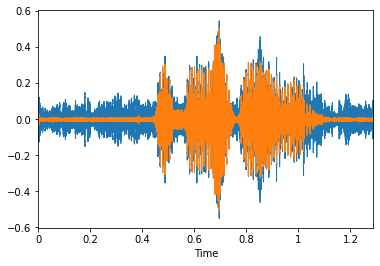

In [ ]:
librosa.display.waveplot(np.squeeze(get_audio(noisy_sounds[4]).numpy(),-1))
librosa.display.waveplot(predict_tflite(noisy_sounds[4]).numpy())